# Problem Set 1
## Data generating process

We assume the general data generating process that fulfills the assumptions of the linear regression model: 

$$x_{i1}=1, x_{i2}:x_{iP} \sim \mathcal{N}(0,1)$$

$$y_{i}=\mathbf{x}_i'\boldsymbol{\beta}+\varepsilon_i$$

with $\boldsymbol{\beta}=\left(\begin{matrix} 1&0.5 &-0.5&-0.5&\ldots & -0.5&  \end{matrix}\right)$ and $\varepsilon_i \sim \mathcal{N}(0,1)$ for all $i$ and (initially) $n=1000$.

- Generate the outcome variable using P=2
- Estimate the parameter vector using OLS
- Calculate standard errors for the parameters

In [57]:
n=1000## number of observations 
P=2### Three covariates including the constant 
####Specify the DGP########
X<-cbind(rep(1,n),matrix(rnorm(n*P,mean=0,sd=1), n,P)) ###generate the X matrix with a constant and P
eps<-rnorm(n)## draw a random error term from a standard normal distribution
beta.vec<-c(1,0.5,rep(-0.5,(P-1)))####beta vector with true effect=0.5
beta.vec
y<-X%*%beta.vec+eps###

[1]  1.0  0.5 -0.5

In [58]:
## Calculate the OLS-Estimator
beta.hat <-solve(t(X)%*%X)%*%t(X)%*%y
beta.hat

1.0011368
0.5008267
-0.4986237


In [59]:
k<-dim(X)[2]  

In [60]:
#####calculate the fitted values/predictions#####
y.hat<- X %*% beta.hat 
###Fitted residuals/in-sample fit
eps.hat<-y-X %*% beta.hat
###calculate the covariance matrix#####
se<-(t(eps.hat)%*%(eps.hat))/(n-k)##### estimated error variance
cov<-se[1]*solve(t(X) %*% X)#####Covariance Matrix 
cov
diag(cov)
d1<-sqrt(diag(cov))###
d1

9.988083e-07,6.390223e-10,-6.176507e-10
6.390223e-10,1.001430e-06,1.944901e-10
-6.176507e-10,1.944901e-10,9.979997e-07


[1] 9.988083e-07 1.001430e-06 9.979997e-07

[1] 0.0009994040 0.0010007147 0.0009989994

## Basic Simulation Study: Consistency 

With Consistency of $\hat{\boldsymbol{\beta}}$ we mean that 

$$\hat{\boldsymbol{\beta}}\overset{p}{\longrightarrow}\boldsymbol{\beta}$$


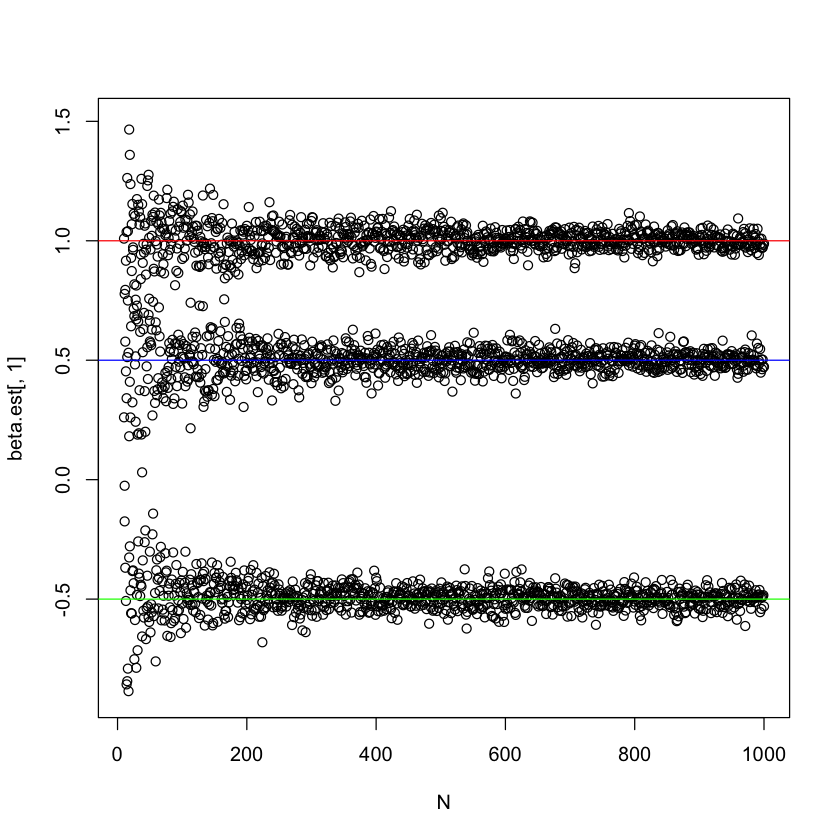

In [32]:
#######################################################################
#######Now: we can do several things and set-up a simulation study#####
#######Is our estimator consistent?####################################
#############1 Thing: What is our criterion? ##########################
#############beta hat should be close to beta##########################
############What do we vary over? Consistency in parametric models -> N#

N=seq(10,1000)

beta.est<-matrix(NA,length(N),P+1)

for(i in 1:length(N))
    {
    X<-cbind(rep(1,N[i]),matrix(rnorm(N[i]*P,mean=0,sd=1), N[i],P)) 
    eps<-rnorm(N[i])
    y<-X%*%beta.vec+eps###
    beta.est[i,] <-solve(t(X)%*%X)%*%t(X)%*%y
}
#beta.vec
#beta.est

plot(N,beta.est[,1],ylim=c(-0.9,1.5))
abline(a=beta.vec[1],0,col="red")
lines(N,beta.est[,2],type="p")
abline(a=beta.vec[2],0,col="blue")
lines(N,beta.est[,3],type="p")
abline(a=beta.vec[3],0,col="green")


In [33]:
Simu.Fun<-function(beta.vec,N,mu,sd,P)
{
  beta.est<-matrix(NA,length(N),P+1)
  for(i in 1:length(N))
  {
    X<-cbind(rep(1,N[i]),matrix(rnorm(N[i]*P,mean=0,sd=1), N[i],P)) ###generate the X matrix with a constant and P
    eps<-rnorm(N[i],mu,sd)## draw a random error term from a standard normal distribution
    y<-X%*%beta.vec+eps###generate the outcome y
    beta.est[i,] <- solve(t(X) %*% X) %*% t(X) %*% y
  }
  return(beta.est)
}
#########################look at processes with more variance############################
#########################as part of consistency argument#################################
beta.est1<-Simu.Fun(beta.vec,N,0,1,P)
beta.est2<-Simu.Fun(beta.vec,N,0,5,P)
beta.est3<-Simu.Fun(beta.vec,N,0,10,P)

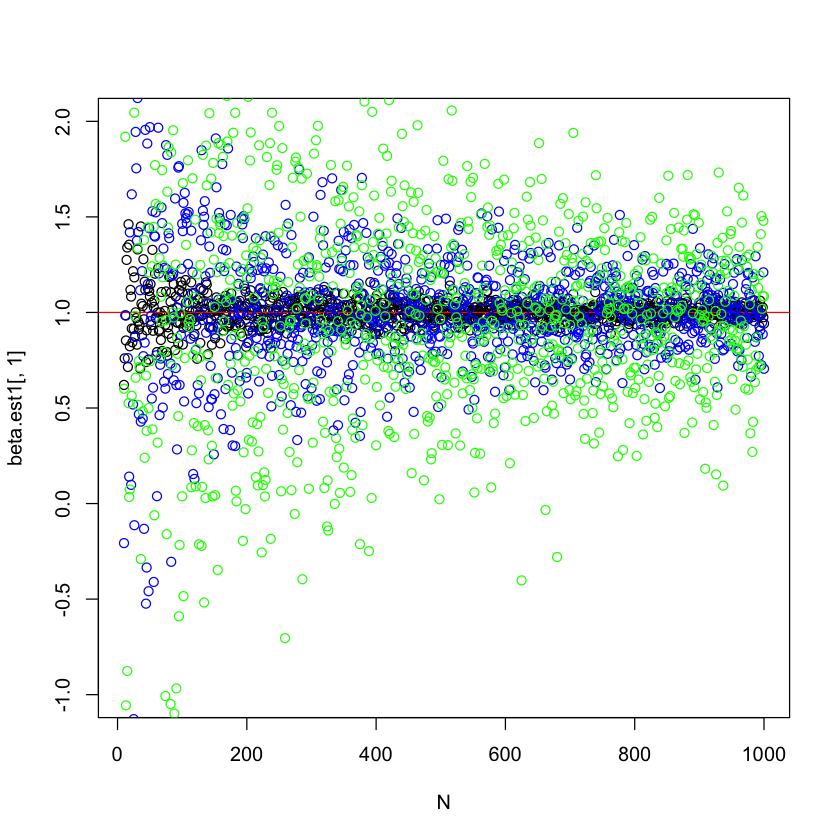

In [36]:
plot(N,beta.est1[,1],ylim=c(-1,2))
abline(a=beta.vec[1],0,col="red")
lines(N,beta.est2[,1],type="p",col="blue")
lines(N,beta.est3[,1],type="p",col="green")

In [37]:
###################################Consistency, strong, weak exogeneity################################
Simu.Fun<-function(beta.vec,N,mu,sd,P,mux,sdx)
{
  #sigma <- matrix(c(4,2,2,3), ncol=2)
 # x <- rmvnorm(n=500, mean=c(1,2), sigma=sigma)
  X<-cbind(rep(1,N),rbinom(N,1,0.5),matrix(rnorm(N*(P-1),mean=mux,sd=sdx), N,(P-1))) ###generate the X matrix with a constant and P
  eps<-rnorm(N,mu,sd)## draw a random error term from a standard normal distribution
  #beta.vec<-c(1,0.5,rep(0,P-1))####beta vector with true effect=0.5
  y<-X%*%beta.vec+eps###generate the outcome y
return(list(X=X,y=y))
}


beta.est<-matrix(NA,length(N),P+1)
beta.est1<-matrix(NA,length(N),P+1)
beta.est2<-matrix(NA,length(N),P+1)

for(i in 1:length(N)){
        result1<-Simu.Fun(beta.vec,N[i],1,1,P,0,1)
        result2<-Simu.Fun(beta.vec,N[i],-1,1,P,0,1)
        X1<-result1$X
        X2<-result2$X
        y1<-as.vector(result1$y)
        y2<-as.vector(result2$y)
        X<-rbind(X1,X2)
        y<-c(y1,y2)
    beta.est[i,] <- solve(t(X) %*% X) %*% t(X) %*% y
    beta.est1[i,] <- solve(t(X1) %*% X1) %*% t(X1) %*% y1
    beta.est2[i,] <- solve(t(X2) %*% X2) %*% t(X2) %*% y2
  }
 




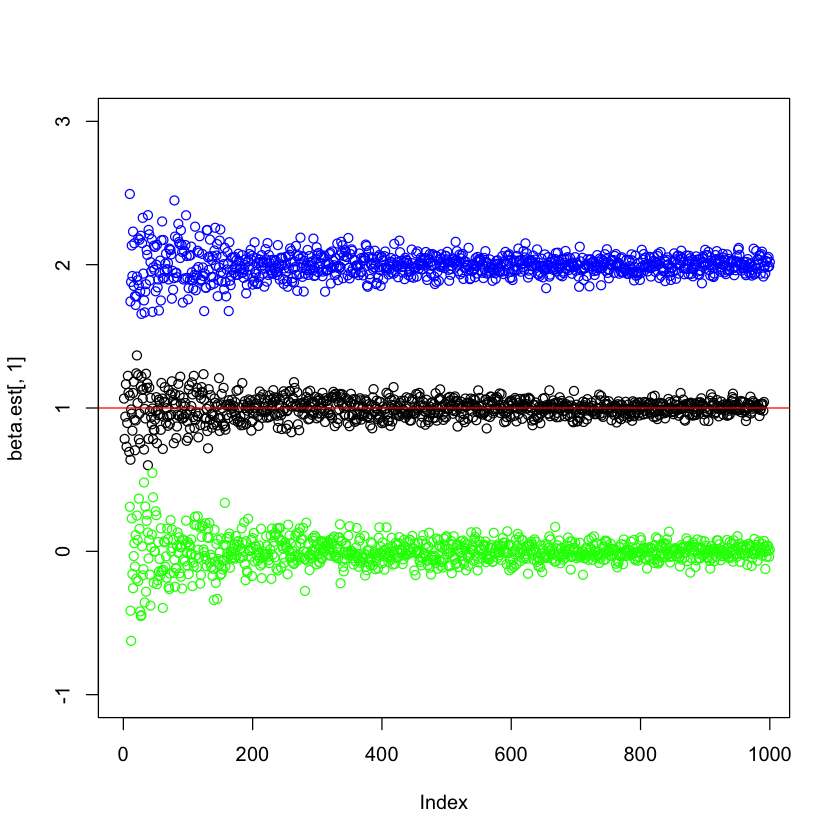

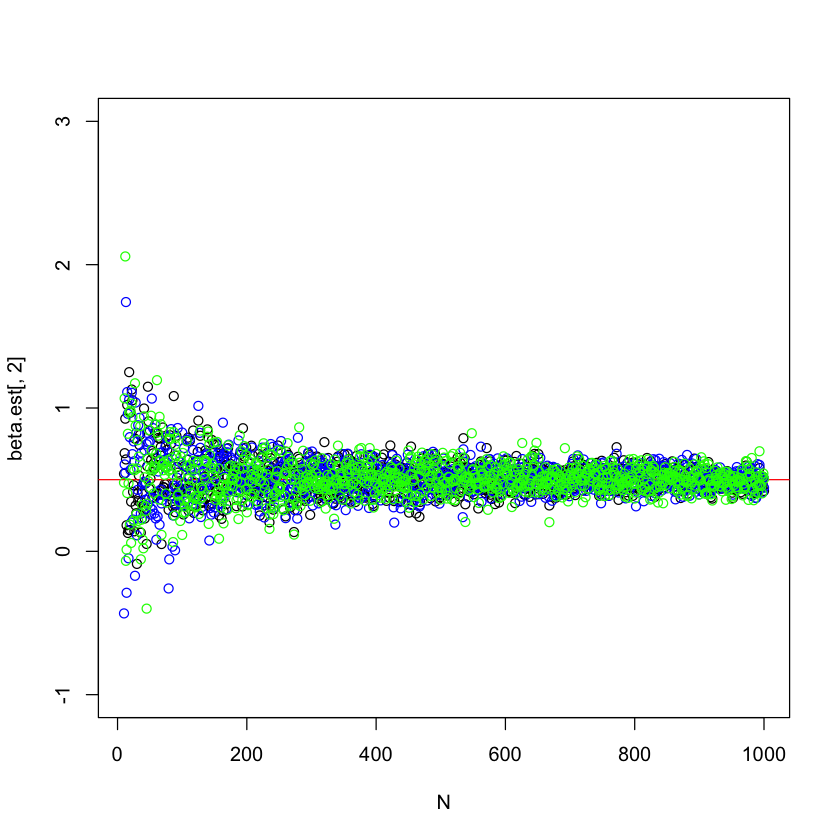

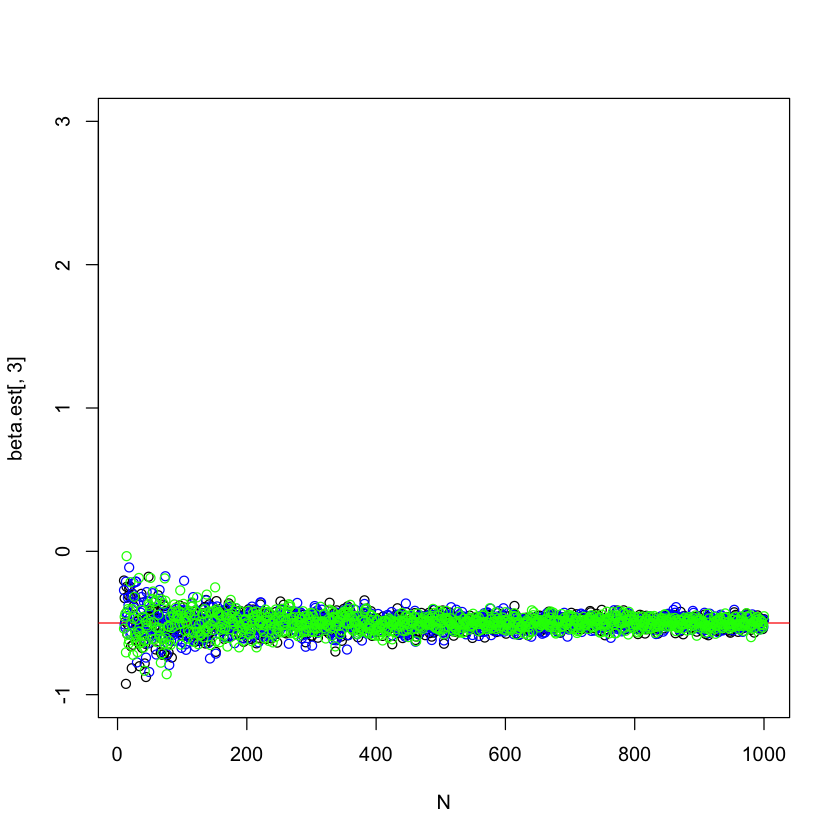

In [42]:
 #########For the constant#############################################
plot(beta.est[,1],ylim=c(-1,3))
abline(a=beta.vec[1],0,col="red")
lines(N,beta.est1[,1],type="p",col="blue")
lines(N,beta.est2[,1],type="p",col="green")

#########For the first covariate#############################################
plot(N,beta.est[,2],ylim=c(-1,3))
abline(a=beta.vec[2],0,col="red")
lines(N,beta.est1[,2],type="p",col="blue")
lines(N,beta.est2[,2],type="p",col="green")

#########For the second covariate#############################################
plot(N,beta.est[,3],ylim=c(-1,3))
abline(a=beta.vec[3],0,col="red")
lines(N,beta.est1[,3],type="p",col="blue")
lines(N,beta.est2[,3],type="p",col="green")



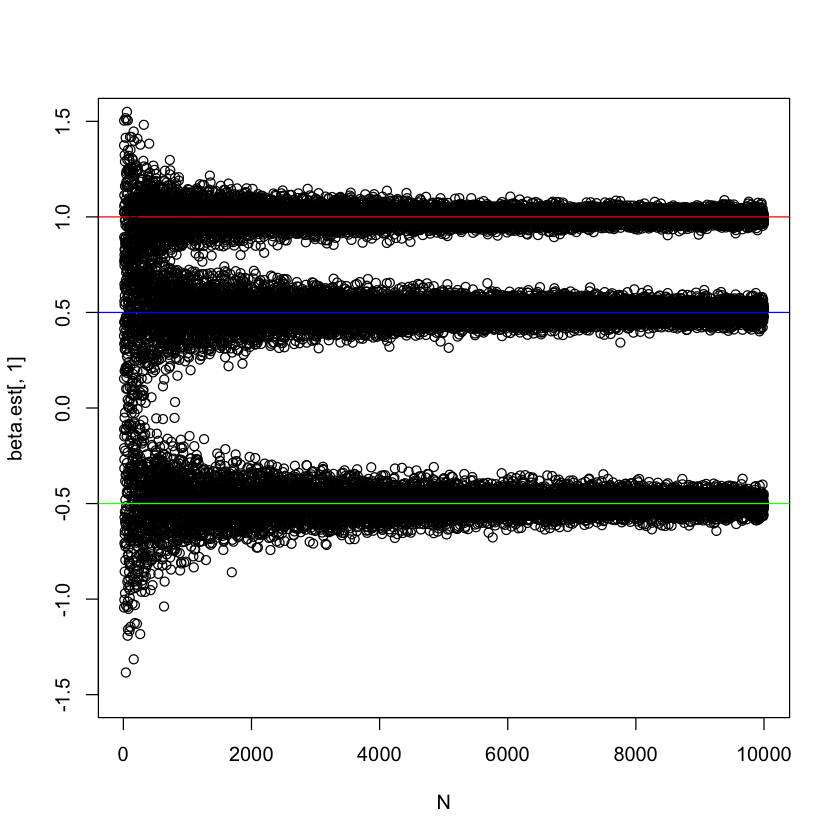

In [55]:
## Consistency: Heteroskedasticity 
Simu.Fun<-function(beta.vec,N,mu,sd,P,mux,sdx)
{
  X<-cbind(rep(1,N),rbinom(N,1,0.5),matrix(rnorm(N*(P-1),mean=mux,sd=sdx), N,(P-1))) ###generate the X matrix with a constant and P
  eps<-X[,3]^2*rnorm(N,mu,sd)## draw a random error term from a standard normal distribution
  y<-X%*%beta.vec+eps###generate the outcome y
  return(list(X=X,y=y))
}

N=seq(10,10000)
beta.est<-matrix(NA,length(N),P+1)
for(i in 1:length(N)){
  result<-Simu.Fun(beta.vec,N[i],0,1,P,0,1)
  X<-result$X
  y<-as.vector(result$y)
  beta.est[i,] <- solve(t(X) %*% X) %*% t(X) %*% y
}

plot(N,beta.est[,1],ylim=c(-1.5,1.5))
abline(a=beta.vec[1],0,col="red")
lines(N,beta.est[,2],type="p")
abline(a=beta.vec[2],0,col="blue",)
lines(N,beta.est[,3],type="p")
abline(a=beta.vec[3],0,col="green")

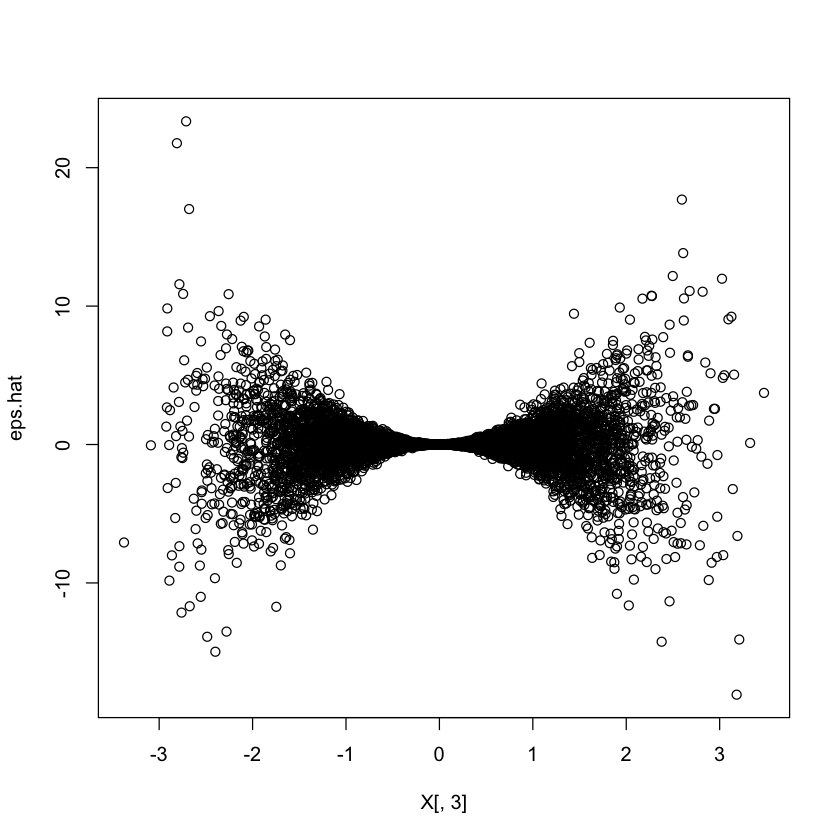

In [56]:
###Fitted residuals/in-sample fit
eps.hat<-y-X %*% beta.est[length(N),]
plot(X[,3],eps.hat)